### 从一元函数的角度理解梯度下降法

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import math

生成一个拥有两个极小值点的四次函数:

In [39]:
f = lambda x: (x+2)*(x+1)*(x-2)*(x-1)
X = np.linspace(-3, 3, 10000) 
Y = np.array([f(x) for x in X])

离散点的最小的 Y 和对应的 X:

In [41]:
Y[np.argmin(Y)], X[np.argmin(Y)]

(-2.2499992119664576, -1.5808580858085808)

绘制出该四次函数曲线可以发现有两个极小值点，并且最小值是左边的极小值点。

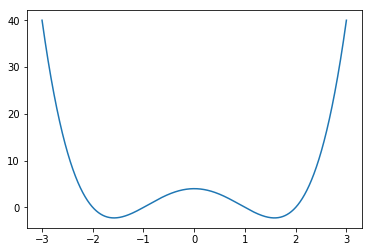

In [42]:
plt.plot(X, Y)
plt.show()

$f(x)$ 为:

$$f(x)=(x+1)(x-1)(x+2)(x-2)$$

对 $f(x)$ 求导可得:

$$f'(x)=4x^3-10x$$

通过对 $f'(x)$ 等于零可得 $f(x)$ 的最小值为 $x=\sqrt{\frac{5}{2}}$。

In [43]:
df = lambda x: 4*x**3-10*x
math.sqrt(5/2)

1.5811388300841898

利用梯度下降法求函数的极小值，基本公式为:

$$x= x-\lambda f'(x)$$

其中 $\lambda$ 是控制 $x$ 更新的幅度，更具体点就是深度学习中的学习率。

下面就是利用梯度下降法求函数的极值点。

In [44]:
lr = 0.001
x = -3
for i in range(1000):
    x -= lr*df(x)
x

-1.581138831026283

$1000$ 其实就是控制 $x$ 更新的次数，对应的是深度学习中的最大迭代次数，可以看出该值基本上和 $\sqrt{\frac{5}{2}}$ 相差无几了。

### 一个好的权重初始化的意义

为了方便理解，同样从一元函数的角度出发，**为什么一个好的权重初始化非常重要？**

首先要知道梯度下降法最大的问题是什么：迭代终止于**局部最优解**，很难找到**全局最优解**。

当 $x$ 初始化为 3 呢？

In [45]:
lr = 0.001
x = 3
for i in range(1000):
    x -= lr*df(x)
x

1.581138831026283

同样的参数取得了不同的结果(ps: 为了计算方便这个四次函数关于 Y 轴对称，两个极值点都为最小值)。

所以这就是一个好的初始化方法的重要性，caffe 权重的初始化方法一般为 Gaussian 和 XavierFiller，偏置项一般常数初始化为 0，具体如何初始化可以参考 [caffe中权值初始化方法](https://www.cnblogs.com/tianshifu/p/6165809.html)。

### 动画展示梯度下降的过程

In [20]:
%%capture
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation
from IPython.display import HTML

def show_anim(X, Y, f, df, max_iterations, lr, initial_x):
    fig, ax = plt.subplots()
    ax.plot(X, Y)
    line, = ax.plot(0, 0, 'ro')
    annotation = ax.annotate("", xy=(0, 0), xytext=(0, 0), arrowprops=dict(arrowstyle="->"))
    # 返回梯度下降的点，生成动画的箭头
    def gradient_descent(f, df, Y, max_iterations=30, lr=0.001, x=-3):
        points = [(x, f(x))]
        print(lr)
        for _ in range(max_iterations):
            x -= lr*df(x)
            points.append((x, f(x)))
        arrows = []
        for i in range(len(points)-1):
            arrows.append((points[i], points[i+1]))
        return arrows
    
    arrows = gradient_descent(f, df, Y, max_iterations, lr, initial_x)

    def init():
        return line,

    def update(index):
        start, end = arrows[index]
        line.set_data(end[0], end[1])

        annotation.set_position(start)
        annotation.xy = end

        return line, annotation

    anim = animation.FuncAnimation(fig, update, interval=500, blit=False, frames=max_iterations, init_func=init)
    return anim

lr = 0.001
initial_x = -3
max_iterations = 100
anim = show_anim(X, Y, f, df, max_iterations, lr, initial_x)

In [21]:
HTML(anim.to_html5_video())

改变一些参数，例如学习率，初始值时会有什么不同。

学习率非常大:

In [37]:
%%capture
%matplotlib inline
lr = 0.075
initial_x = -3
max_iterations = 100
anim = show_anim(X, Y, f, df, max_iterations, lr, initial_x)

In [38]:
HTML(anim.to_html5_video())

设定权重初始值（即 $x$）、学习率、最大迭代次数等，会发现以下几点:
* 越在前面 loss 收敛速度越快，后面则改变幅度很小。
* 学习率过大，或导致 loss 震荡，一直达不到极小值点，虽然这里 lr=0.07 时仍然收敛了，这是因为如果 lr 过大，会直接导致超出计算机能表示的数值范围，在这里就能看出 loss 的变化幅度已经很大了。超出数值范围，对应到 caffe 中就是 Nan（not a number），这是新手容易遇到的问题。
* 学习率过小，收敛速度慢。

因此，如何选择一个合适的学习率很重要，同时也要应用相应的学习率衰减策略（略）。

所以深度学习的基础算法之一，梯度下降其实并不难理解，只需要一些数值计算的知识即可。通过一元函数的梯度下降法求极值点，可以对应到深度学习中的很多知识。真正的深度学习当然不可能只是一个一元函数，而是非常复杂的函数，但不管在哪，梯度下降法都是适用的。